In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# NBA players stats, season 2022/2023
# (I've written code for this analysis in january, but i've loaded more recent data and updated conclusions at the beginning of april.)
# Columns : 
# Player = Player, Team = Team, Age = Age, GP = Games Played, W = Wins, L = Loses, Min = Minutes Played, PTS = Points
# FG% = Field Goal Percentage, 3P% = 3 Point Field Goal Percentage, FT% = Free throw percentage, AST = Assists, PF = Personal Fouls

In [3]:
player_stats = pd.read_csv('nba_stats.csv')

# Basic info about dataset

In [4]:
player_stats.head()

,Player,Team,Age,GP,W,L,Min,PTS,FG%,3P%,FT%,AST,PF
0,Jayson Tatum,BOS,25,72,51,21,2674.5,2185,46.7,35.4,85.7,332,156
1,Joel Embiid,PHI,29,64,42,22,2215.1,2110,54.2,33.0,85.8,266,201
2,Luka Doncic,DAL,24,64,32,32,2339.2,2096,49.8,34.7,74.2,520,162
3,Shai Gilgeous-Alexander,OKC,24,66,32,34,2344.6,2081,51.0,34.6,90.8,357,184
4,Julius Randle,NYK,28,77,44,33,2737.3,1936,45.9,34.3,75.7,316,233


In [5]:
player_stats.shape

(531, 13)

In [22]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  531 non-null    object 
 1   Team    531 non-null    object 
 2   Age     531 non-null    int64  
 3   GP      531 non-null    int64  
 4   W       531 non-null    int64  
 5   L       531 non-null    int64  
 6   Min     531 non-null    float64
 7   PTS     531 non-null    int64  
 8   FG%     531 non-null    float64
 9   3P%     531 non-null    float64
 10  FT%     531 non-null    float64
 11  AST     531 non-null    int64  
 12  PF      531 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 54.1+ KB


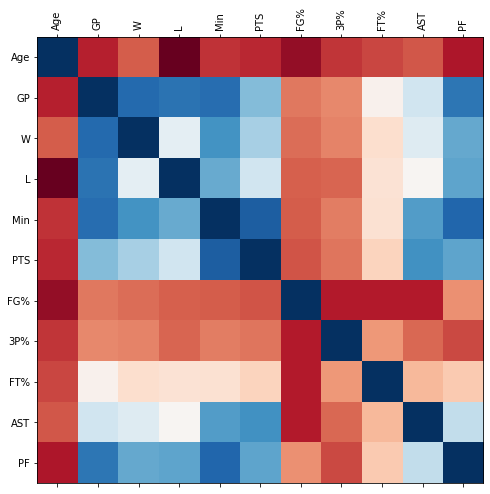

In [23]:
# Checking if there is unexpected correlation between some columns
# Figure shows no special correlations
# Existing dependencies are fairly obvious, for example time spend playing in more games increases sum of successfull throws in overall career etc.

corr = player_stats.corr()
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [25]:
# Ten players with highest points score in current season

player_stats[["Player","PTS"]].sort_values(by='PTS', ascending=False).head(10)

,Player,PTS
0,Jayson Tatum,2185
1,Joel Embiid,2110
2,Luka Doncic,2096
3,Shai Gilgeous-Alexander,2081
4,Julius Randle,1936
5,Giannis Antetokounmpo,1931
6,Donovan Mitchell,1879
7,Damian Lillard,1866
8,Anthony Edwards,1864
9,Trae Young,1862


In [26]:
# Ten players with greatest number of assists in current season

player_stats[["Player","AST"]].sort_values(by='AST', ascending=False).head(10)

,Player,AST
9,Trae Young,705
15,Nikola Jokic,664
60,James Harden,604
66,Tyrese Haliburton,585
29,Domantas Sabonis,546
75,Russell Westbrook,532
27,Darius Garland,528
2,Luka Doncic,520
125,Chris Paul,519
193,Draymond Green,486


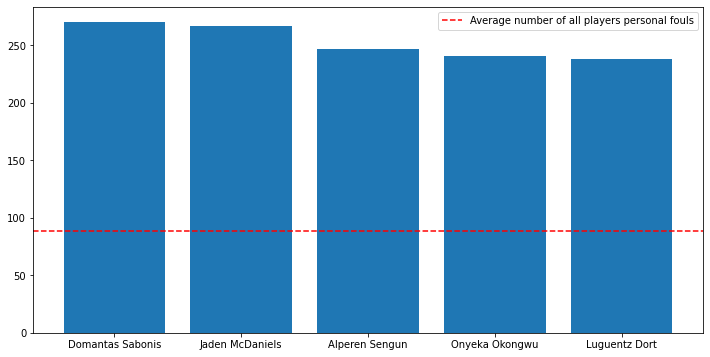

In [27]:
# Players who foul most often in current season (turns out they commit fouls 2 times more than average player)

PF_rank = player_stats[["Player","PF"]].sort_values(by='PF', ascending=False).head(5)
plt.figure(figsize=(12,6))
plt.bar(PF_rank["Player"],PF_rank["PF"])
plt.axhline(y=player_stats["PF"].mean(), color='red', linestyle='--', label='Average number of all players personal fouls')
plt.legend()
plt.show()

# Players age

<AxesSubplot:>

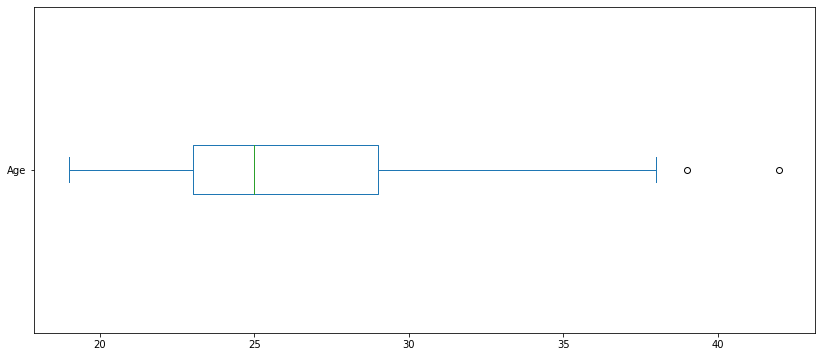

In [28]:
# Players age shown on box chart, interquartile range shows that 50 % of players are 23-29 years old
# Youngest players are 19 years old, oldest one is 42 and median is equal to 25 years old.

player_stats['Age'].plot(kind='box', vert=False, figsize=(14,6))

In [30]:
# Statistics of Udonis Haslem, oldest player in current season

player_stats[player_stats['Age']>40]

,Player,Team,Age,GP,W,L,Min,PTS,FG%,3P%,FT%,AST,PF
514,Udonis Haslem,MIA,42,6,3,3,47.2,3,8.3,0.0,50.0,0,8


In [31]:
# Average players age

player_stats['Age'].mean()

25.930320150659135

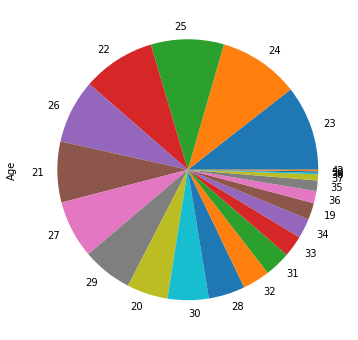

In [33]:
# Pie plot showcases that players with age in range of 21-26 consist of over half of all players

player_stats['Age'].value_counts().plot(kind='pie', figsize=(6,6));

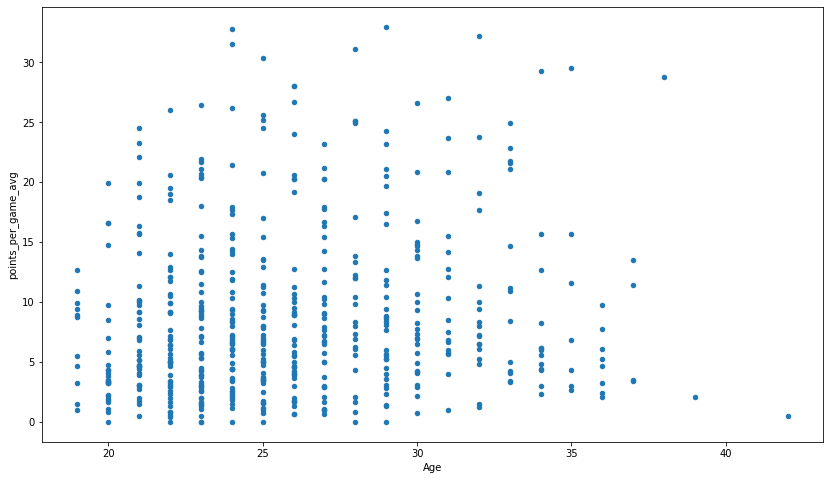

In [34]:
# Plot showing players age on x axis and their average scores on y axis.
# On first glance it may lead to conclusion that players who are for example 19 and 20 years
# old are having worse stats than other age groups, but it is most probably caused by
# the fact that these players are just starting the career and they are allowed on basketball court
# just for a short ammount of time. 


player_stats['points_per_game_avg'] = player_stats['PTS'] / player_stats['GP']
player_stats.plot(kind='scatter', x='Age', y='points_per_game_avg', figsize=(14,8));

# Other statistics

In [36]:
# All points earned in the current season by Dallas Mavericks 

player_stats[player_stats['Team']=='DAL']['PTS'].sum()

9017

In [37]:
# Searching for which teams the very best players play for
# It is shown that there is no particular team consisting of the best players
# Rather, most of the teams have at least 1 player who is in top 30 (points scored in season) 

Teams1 = player_stats['Team'].value_counts()
teams = player_stats[['Player','Team','PTS']].sort_values(by='PTS', ascending=False).head(30)
teams['Team'].value_counts()

BOS    2
CLE    2
GSW    2
CHI    2
SAC    2
NYK    2
DAL    2
MIL    1
NOP    1
MIA    1
WAS    1
MEM    1
BKN    1
HOU    1
TOR    1
DEN    1
UTA    1
PHI    1
OKC    1
ATL    1
MIN    1
POR    1
LAL    1
Name: Team, dtype: int64

In [38]:
# Players with the best three-point throw accurancy (who played in at least 10 games)

t1 = player_stats[['Player','Team','3P%']].sort_values(by='3P%', ascending=False).head(10)
t1[player_stats['GP']>10]

C:\Users\EURO\AppData\Local\Temp\ipykernel_9260\3403542312.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t1[player_stats['GP']>10]


,Player,Team,3P%
354,DeAndre Jordan,DEN,100.0
219,Nick Richards,CHA,100.0
405,Robin Lopez,CLE,66.7
391,Richaun Holmes,SAC,66.7
441,Peyton Watson,DEN,62.5


C:\Users\EURO\AppData\Local\Temp\ipykernel_9260\4284231631.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t2 = t1[player_stats['GP']>10]


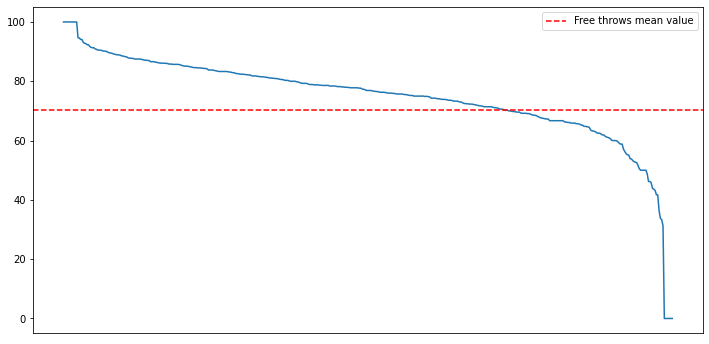

In [40]:
# Line chart showcasing free throws accurancy of all players in current season. 
# It seems that most of the players have accurancy of 70% (or more) of successful free throws made

t1 = player_stats[['Player','Team','FT%']].sort_values(by='FT%', ascending=False)
ft_mean = t1['FT%'].mean()
t2 = t1[player_stats['GP']>10]
plt.figure(figsize=(12,6))
plt.plot(t2['Player'],t2['FT%'])
plt.axhline(y=ft_mean, color='red', linestyle='--', label='Free throws mean value')
plt.xticks([])
plt.legend()
plt.show()